In [1]:
%pip install -q pandas matplotlib numpy scipy

Note: you may need to restart the kernel to use updated packages.


[31.65715446  0.20919486]


,meas,adc
0,1.434,0.038695
1,1.434,0.038692
2,1.434,0.038687
3,1.434,0.038692
4,1.434,0.038686
...,...,...
125,16.280,0.507629
126,16.280,0.507639
127,16.280,0.507626
128,16.280,0.507625


Text(0, 0.5, 'Measured[A]')

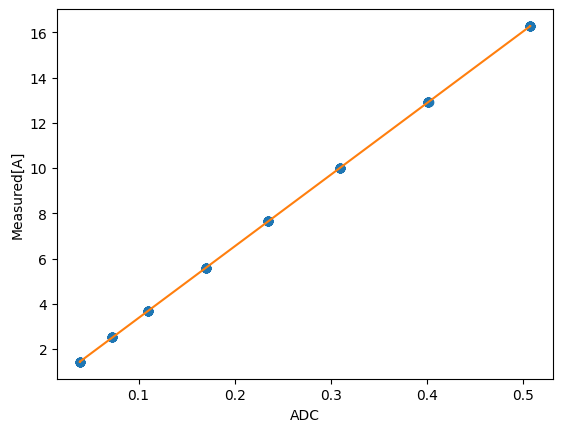

In [4]:
import scipy as sci
import pandas as pd
import matplotlib.pyplot as plt

def f(x, a, b):
    return (a * x) + b


df = pd.read_csv('input_voltage.csv')

popt, pcov = sci.optimize.curve_fit(f, df.adc, df.meas)

print(popt)

display(df)

# Plot the data the measured values in points and the fit in a line
plt.plot(df.adc, df.meas, 'o', label='Measured')
plt.plot(df.adc, f(df.adc, *popt), '-', label='Fit')
plt.xlabel('ADC')
plt.ylabel('Measured[A]')

# # Plot the fit and the dac values
# plt.figure()
# plt.plot(df.adc, f(df.adc, *popt), '-', label='Fit')
# plt.plot(df.adc, f(df.dac, *popt) , 'o', label='DAC')
# plt.xlabel('ADC')
# plt.ylabel('Measured[A]')


Optimal parameters: [11.22826758 -0.08353555]
Average error: 0.013055562905696518%
Percentage=0     -3.762503
1     -3.762503
2     -3.788049
3     -3.788049
4     -3.709087
         ...   
211   -0.293137
212   -1.969146
213   -1.969146
214   -1.253068
215   -1.253068
Length: 216, dtype: float64


,meas,adc,dac
0,0.00,0.012300,0.00
1,0.00,0.012300,0.00
2,0.00,0.012333,0.00
3,0.00,0.012333,0.00
4,0.00,0.012231,0.00
...,...,...,...
211,2.98,0.273220,0.28
212,2.98,0.275385,0.28
213,2.98,0.275385,0.28
214,2.98,0.274460,0.28


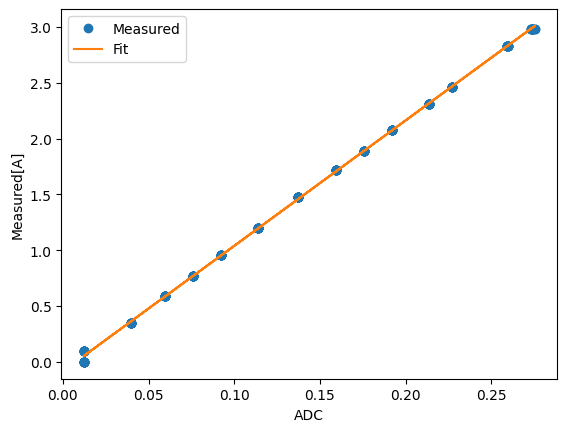

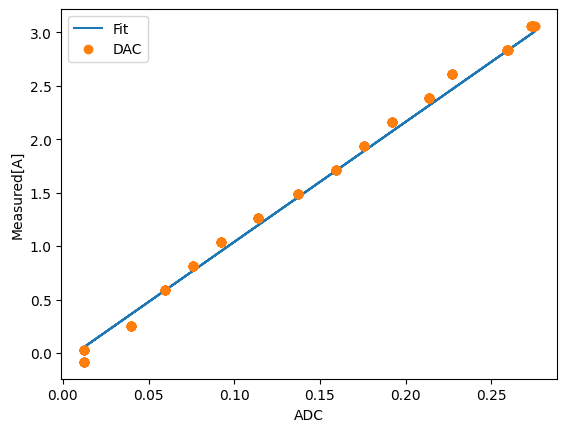

In [ ]:
import scipy as sci
import pandas as pd
import matplotlib.pyplot as plt

def f(x, a, b):
    return (a * x) + b

# Read the input data from CSV
df = pd.read_csv('input_current.csv')

# Fit the curve to the data
popt, pcov = sci.optimize.curve_fit(f, df.adc, df.meas)

# Print the optimal parameters
print(f'Optimal parameters: {popt}')

# Calculate the fitted values
fitted_values = f(df.adc, *popt)

# Calculate the error
error = (df.meas - fitted_values)
# Calculate the average error
average_error = error.abs().mean()
# Calculate percentage error
percentage_error = (error / df.meas.mean()) * 100
print(f'Average error: {average_error}%')
print(f'Percentage={percentage_error}')

# Display the dataframe
display(df)

# Plot the data (measured values as points and the fit as a line)
plt.plot(df.adc, df.meas, 'o', label='Measured')
plt.plot(df.adc, fitted_values, '-', label='Fit')
plt.xlabel('ADC')
plt.ylabel('Measured[A]')
plt.legend()

# Plot the fit and DAC values
plt.figure()
plt.plot(df.adc, fitted_values, '-', label='Fit')
plt.plot(df.adc, f(df.dac, *popt), 'o', label='DAC')
plt.xlabel('ADC')
plt.ylabel('Measured[A]')
plt.legend()

plt.show()

